# Data Dive with Group 2 
#### Imtiaz Farkhanda, Jay Farmer, Caley Foster, Sydney Fuhrig

---
#  BUSINESS UNDERSTANDING 
---

## Business Objective
- Analyze Yelp reviews for restuarants in Alberta / Quebec for new Restaurant Owner.
- Determine common words that describe restaurants with 5-star reviews.
- Determine common words that describe restaurants with 1-star reviews. 
- Compare themes found in 5 star and 1 star reviews. 
- Determine areas of focus to help set business owner on a path towards success.
- Determine next place to order pizza from by filtering data

 
## Technical Objective
- Clean and model data.
- Combined datasets using merge.
- Use NLP techniques to review the text used in the different restuarant reviews.
    - WordCloud
    - N-grams
    - Seaborn Visualizations
- Utilize recommender system using PCA:
    - Clean the data and columns
    - Transform data using sklearn
    - Creating a Correlation Matrix for a Recommender
    - Analyze other Restaurants for Recommendations

## Import Libraries

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# New trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

/var/folders/zn/d6mm5n7j1zs1c5fbprwtzpkh0000gn/T/ipykernel_32903/2899070885.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Import Data from File

In [2]:
#Import from a File and see info
users = pd.read_csv('data/Full_User.csv', index_col = 0, header=0)
restaurants = pd.read_csv('data/Restaurants.csv', index_col = 0, header=0)
AQ_reviews = pd.read_csv('data/Alberta_Quebec_Reviews.csv', index_col = 0, header=0)
users.info()
restaurants.info()
AQ_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399953 entries, 0 to 1399952
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1399953 non-null  object 
 1   name                1399950 non-null  object 
 2   review_count        1399953 non-null  int64  
 3   yelping_since       1399953 non-null  object 
 4   useful              1399953 non-null  int64  
 5   funny               1399953 non-null  int64  
 6   cool                1399953 non-null  int64  
 7   elite               70213 non-null    object 
 8   fans                1399953 non-null  int64  
 9   average_stars       1399953 non-null  float64
 10  compliment_hot      1399953 non-null  int64  
 11  compliment_more     1399953 non-null  int64  
 12  compliment_profile  1399953 non-null  int64  
 13  compliment_cute     1399953 non-null  int64  
 14  compliment_list     1399953 non-null  int64  
 15  compliment_note

In [3]:
pd.set_option('display.max_columns', None)
users.sample(5)

user_id     name  review_count        yelping_since  \
246082   AFV43aKVmVBvnJAt_uuPNg  William            77  2011-04-02 01:14:07   
1354777  xvwPh6iw4-1ziVcvuuUPIw      Dre             2  2017-04-21 21:42:12   
531954   NK7M2mN08_e5zKJMfPaa-A    Sarah            13  2016-01-26 21:37:10   
71604    2GRvuSpUydgsIBuigTZezg  Phyllis             2  2017-09-15 17:41:36   
1047902  jtglaSU8aqw7RBslwqi3eg    Sarah             2  2011-12-23 19:12:08   

         useful  funny  cool elite  fans  average_stars  compliment_hot  \
246082       57     22    19   NaN     0           3.99               0   
1354777       1      0     0   NaN     0           2.50               0   
531954        6      0     4   NaN     0           4.29               0   
71604         5      0     0   NaN     0           2.50               0   
1047902       1      0     0   NaN     0           5.00               0   

         compliment_more  compliment_profile  compliment_cute  \
246082                 0                   0                0   
1354777                0                   0                0   
531954                 0                   0                0   
71604                  0                   0                0   
1047902                0                   0                0   

         compliment_list  compliment_note  compliment_plain  compliment_cool  \
246082                 0                1                 1                0   
1354777                0                0                 0                0   
531954                 0                0                 0                1   
71604                  0                0                 0                0   
1047902                0                0                 0                0   

         compliment_funny  compliment_writer  compliment_photos  
246082                  0                  1                  1  
1354777                 0                  0                  0  
531954                  1                  0                  0  
71604                   0                  0                  0  
1047902                 0                  0                  0

In [4]:
restaurants.sample(5)

business_id                name               address  \
151046  NI75svhUpw1u0ClzrPFPCQ         Grand China      6631 Mayfield Rd   
75703   WiI6cXuXOv_3ZsAXMVR5jw            Wok Chef   1 Felcher Boulevard   
127320  vU_4dd08zDFMAAKo6c0-ew  Hot Dog on a Stick  3111 W Chandler Blvd   
2283    Ehq7wmTyxVdTJkv_MoRqmg        Wraps & Jerk     1046 Finch Avenue   
74692   D9Uf7UmU2KlgS_H8lJwOrA     Bolet's Burrito  134 Lower Sherbourne   

                          city state postal_code   latitude   longitude  \
151046               Cleveland    OH       44124  41.520549  -81.440117   
75703   Whitchurch-Stouffville    ON     L4A 7X4  44.033475  -79.297368   
127320                Chandler    AZ       85225  33.302246 -111.897967   
2283                   Toronto    ON     M3J 2E5  43.767788  -79.471718   
74692                  Toronto    ON     M5A 1K5  43.649977  -79.367884   

        stars  review_count  is_open  \
151046    2.5            26        1   
75703     4.0             4        1   
127320    4.5             3        0   
2283      4.0            12        1   
74692     4.0            97        1   

                                               attributes  \
151046  {'RestaurantsReservations': 'False', 'Restaura...   
75703   {'RestaurantsPriceRange2': '2', 'GoodForKids':...   
127320  {'RestaurantsPriceRange2': '1', 'NoiseLevel': ...   
2283    {'HasTV': 'False', 'RestaurantsAttire': "'casu...   
74692   {'OutdoorSeating': 'False', 'RestaurantsAttire...   

                                               categories  \
151046                               Restaurants, Chinese   
75703   Food Delivery Services, Food, Restaurants, Chi...   
127320      Restaurants, Hot Dogs, American (Traditional)   
2283                               Restaurants, Caribbean   
74692                          Food, Mexican, Restaurants   

                                                    hours  
151046  {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...  
75703   {'Tuesday': '12:0-21:30', 'Wednesday': '12:0-2...  
127320                                                NaN  
2283                                                  NaN  
74692   {'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'...

In [5]:
AQ_reviews.sample(5)

business_id                    name  \
174724  qms46yf3ZJmfZ1ixGoiOCg      Chicken-On-The-Way   
83300   -YqWGJ5eS2hzvflH6Fmmgw            Pizza Nikkos   
45796   oZHbPhIj01_31jqD053a_Q   Jérôme Ferrer Europea   
133056  xtktc6OTdtilAREgJH-P4g     Burger Bar Crescent   
203686  Xi_RPz2Kq1v7NiR7EKIVOQ  Peppercorns Restaurant   

                     review_id                 user_id  stars  useful  funny  \
174724  EoAtJCiAX3Z2oUi9kbPXLQ  hF_CVbDLWssXWTQXVgj2lw    1.0     0.0    1.0   
83300   oJ7kKaEjucJ7wiCGwU-7UA  cY22_GeMpwubsXaYux9-oQ    5.0     0.0    0.0   
45796   Y0FouLy5DeMskZbx3TKYIg  n73Qtb87fvLhiMzTK9ppxw    4.0     0.0    0.0   
133056  pfmiDNPGmxlrix4KljD8GQ  FDsePvrkJ2vqiZB-M8jJig    5.0     0.0    0.0   
203686  qQTaaKZZRCp7dUcJ4ny4fQ  0RsS3-oJ_MBJ-Fb9I-oBhA    5.0     0.0    0.0   

        cool                                               text  \
174724   0.0  Gross... the food is slimy and greasy and ther...   
83300    0.0  Definitely recommend trying their subs, pizza ...   
45796    0.0  Great service, good food. Fantastic wine selec...   
133056   0.0  Awesome food.. great service and lots of choic...   
203686   0.0  A great resturant with some very nice servers....   

                       date  
174724  2017-05-28 04:42:38  
83300   2016-02-14 23:18:50  
45796   2018-11-06 20:23:39  
133056  2019-09-29 19:04:59  
203686  2018-03-28 17:06:38

## Create the DF for our Analysis

### Create df_reviews

In [6]:
#Drop unneeded Columns from Users
users = users.drop(columns=['compliment_hot','compliment_more','compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool','compliment_funny','compliment_writer','compliment_photos'])
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399953 entries, 0 to 1399952
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   user_id        1399953 non-null  object 
 1   name           1399950 non-null  object 
 2   review_count   1399953 non-null  int64  
 3   yelping_since  1399953 non-null  object 
 4   useful         1399953 non-null  int64  
 5   funny          1399953 non-null  int64  
 6   cool           1399953 non-null  int64  
 7   elite          70213 non-null    object 
 8   fans           1399953 non-null  int64  
 9   average_stars  1399953 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 117.5+ MB


In [7]:
#rename Columns from Users
users = users.rename(columns = {'name':'reviewer_name'})
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399953 entries, 0 to 1399952
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   user_id        1399953 non-null  object 
 1   reviewer_name  1399950 non-null  object 
 2   review_count   1399953 non-null  int64  
 3   yelping_since  1399953 non-null  object 
 4   useful         1399953 non-null  int64  
 5   funny          1399953 non-null  int64  
 6   cool           1399953 non-null  int64  
 7   elite          70213 non-null    object 
 8   fans           1399953 non-null  int64  
 9   average_stars  1399953 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 117.5+ MB


In [8]:
#Drop unneeded Columns from Restaurants
restaurants = restaurants.drop(columns=['address', 'latitude','longitude','hours'])
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63944 entries, 8 to 209390
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   63944 non-null  object 
 1   name          63944 non-null  object 
 2   city          63944 non-null  object 
 3   state         63944 non-null  object 
 4   postal_code   63850 non-null  object 
 5   stars         63944 non-null  float64
 6   review_count  63944 non-null  int64  
 7   is_open       63944 non-null  int64  
 8   attributes    62310 non-null  object 
 9   categories    63944 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 5.4+ MB


In [9]:
#Merge DataFrames
df_reviews = pd.merge(AQ_reviews, users, how='left', on = 'user_id')
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233040 entries, 0 to 233039
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   business_id    233040 non-null  object 
 1   name           233040 non-null  object 
 2   review_id      233040 non-null  object 
 3   user_id        233040 non-null  object 
 4   stars          233040 non-null  float64
 5   useful_x       233040 non-null  float64
 6   funny_x        233040 non-null  float64
 7   cool_x         233040 non-null  float64
 8   text           233040 non-null  object 
 9   date           233040 non-null  object 
 10  reviewer_name  233039 non-null  object 
 11  review_count   233040 non-null  int64  
 12  yelping_since  233040 non-null  object 
 13  useful_y       233040 non-null  int64  
 14  funny_y        233040 non-null  int64  
 15  cool_y         233040 non-null  int64  
 16  elite          80164 non-null   object 
 17  fans           233040 non-nul

### Create df_reviews_all

In [10]:
# Merge Data
df_reviews_all = pd.merge(df_reviews, restaurants, how='left', on = 'business_id')
df_reviews_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233040 entries, 0 to 233039
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   business_id     233040 non-null  object 
 1   name_x          233040 non-null  object 
 2   review_id       233040 non-null  object 
 3   user_id         233040 non-null  object 
 4   stars_x         233040 non-null  float64
 5   useful_x        233040 non-null  float64
 6   funny_x         233040 non-null  float64
 7   cool_x          233040 non-null  float64
 8   text            233040 non-null  object 
 9   date            233040 non-null  object 
 10  reviewer_name   233039 non-null  object 
 11  review_count_x  233040 non-null  int64  
 12  yelping_since   233040 non-null  object 
 13  useful_y        233040 non-null  int64  
 14  funny_y         233040 non-null  int64  
 15  cool_y          233040 non-null  int64  
 16  elite           80164 non-null   object 
 17  fans      

In [11]:
#Sample Data Set
df_reviews_all.sample(10)

business_id                            name_x  \
132143  D9ZMr-HzxHkrdnFW0sJT0Q          Pelican Pier Seafood Bar   
180199  aTw-24AuD_wSTzQgNPf7eQ              La Maison de Banh Mi   
157762  qm8W2fhcCxFrGcAUptJnOA                        Elbow Room   
141271  9eqyZBdiYfodB2tNfJHCHA  Saigon Y2K Vietnamese Restaurant   
108128  eAf1fi8wlDt433b6ITQtlw                      Orange Julep   
104934  2meb5cwKh125tF5IwUiIJA               Pâtisserie Harmonie   
95317   qcP9AhS2tAM_oAjZ_o7U4g                      Guaca & Molé   
115739  hLq2YUBmEg7UZma8yH7Ddw                        Fiorellino   
24308   uUTUx_wEqvv3dl6ieE0h9g                  Augusto Al Gusto   
121256  00NrWSvMkQhPGFoO_efv9Q                          Pho So 1   

                     review_id                 user_id  stars_x  useful_x  \
132143  9r6VGe9_Xjr2Y2X0R6JGNw  eoiL_d6CH84T2rnYAM0_uA      4.0       2.0   
180199  mfXZMbNSIff1Uhpqgzpojw  _IML94VoaGSGuQYyT_AXGw      5.0       0.0   
157762  gv1H83Ivcyh9Wc7QpCaTiQ  PphozNKJwlnYse5D2W5Vyg      4.0       0.0   
141271  PXjt-4W0N89fiYVaKA-wSw  ENx6ccaeNRJdfaegr_2ydQ      1.0       1.0   
108128  Jx7JzRlapgbh82UNwhf13w  C7lXOTSLUAHG3gkG_Q_39w      3.0      10.0   
104934  Zp_SZCYvG3rQ0CKPcC0R1w  gzELztF0nJnwEDkpd5uT0w      4.0       2.0   
95317   cHs4NBCMfwWZWqPXwqpgJA  MD-QMO8zcqd584wcpzo9sg      5.0       8.0   
115739  1itiFVj_v2h7DcUypeX6Hw  718JvkCUjTJsV35Aa6Mh1w      4.0       0.0   
24308   UrbHG4mj3lct3yQMlp3H9Q  xC-q_yh0XwcjRLimkS3RNg      3.0       0.0   
121256  dw1SlTFr9EDWFwG6oZWcEg  5PBYtJu9AkeqKyuEnOZZMQ      2.0       0.0   

        funny_x  cool_x                                               text  \
132143      0.0     1.0  Hidden in a strip mall, you wouldn't notice th...   
180199      0.0     0.0  Excellent sandwich et excellent pokebowl. Ingr...   
157762      0.0     0.0  Loved the location, food, friendly staff. Took...   
141271      0.0     0.0  I had a seafood soup, which was ok, at least i...   
108128      3.0    10.0  We had some (childish) fun taking pictures in ...   
104934      0.0     1.0  This Chinatown bakery is one of the cleanest a...   
95317       1.0     5.0  une des meilleurs place que j'ai manger du Mex...   
115739      0.0     0.0  Delicious cozy spot - innovative salad Niçoise...   
24308       0.0     0.0  August Al Gusto is a Peruvian shop nestled amo...   
121256      0.0     0.0  The lady at the bar acts like she is doing you...   

                       date reviewer_name  review_count_x  \
132143  2016-06-27 21:47:18          Jenn             499   
180199  2018-09-16 18:41:37          Eric              27   
157762  2018-07-17 14:23:05         Grace               5   
141271  2014-03-21 04:50:12         Aaron               5   
108128  2016-05-17 19:41:38       Barbara             353   
104934  2016-03-27 15:56:39         Cathy             239   
95317   2019-08-14 15:45:07         Simon             271   
115739  2018-01-07 00:34:30      Jennifer               5   
24308   2018-08-15 17:44:16         Jonny            1576   
121256  2015-09-08 11:04:00         Leigh              11   

              yelping_since  useful_y  funny_y  cool_y  \
132143  2013-01-29 05:41:26       778      239     287   
180199  2014-12-21 18:06:43         3        0       2   
157762  2018-03-30 16:07:13         1        0       0   
141271  2014-02-28 04:44:54         2        0       0   
108128  2014-04-11 16:14:18      3483     1380    2578   
104934  2014-05-02 19:14:38       476       34     152   
95317   2011-05-29 07:58:45      2357      596    1741   
115739  2015-02-15 22:46:40         4        0       0   
24308   2012-01-07 19:47:25      2112      445     976   
121256  2011-02-21 02:16:33        13        2       0   

                                     elite  fans  average_stars  \
132143       2013,2014,2015,2016,2017,2018    38           3.82   
180199                                 NaN     0           4.78   
157762                                 NaN     0   

In [12]:
#Clean Data
df_reviews_all = df_reviews_all.drop(columns=['name_y','business_id','review_id','user_id'])
df_reviews_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233040 entries, 0 to 233039
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name_x          233040 non-null  object 
 1   stars_x         233040 non-null  float64
 2   useful_x        233040 non-null  float64
 3   funny_x         233040 non-null  float64
 4   cool_x          233040 non-null  float64
 5   text            233040 non-null  object 
 6   date            233040 non-null  object 
 7   reviewer_name   233039 non-null  object 
 8   review_count_x  233040 non-null  int64  
 9   yelping_since   233040 non-null  object 
 10  useful_y        233040 non-null  int64  
 11  funny_y         233040 non-null  int64  
 12  cool_y          233040 non-null  int64  
 13  elite           80164 non-null   object 
 14  fans            233040 non-null  int64  
 15  average_stars   233040 non-null  float64
 16  city            233040 non-null  object 
 17  state     

In [13]:
df_reviews_all = df_reviews_all.drop(columns=['useful_x','funny_x','cool_x','useful_y','funny_y','cool_y','fans'])
df_reviews_all = df_reviews_all.rename(columns = {'name_x':'restaurant_name', 'stars_x':'restaurant_rating','stars_y':'reviewer_rating','name_y':'reviewer_name','review_count_x':'review_count_rest','review_count_y':'review_count_reviewer'})
df_reviews_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233040 entries, 0 to 233039
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   restaurant_name        233040 non-null  object 
 1   restaurant_rating      233040 non-null  float64
 2   text                   233040 non-null  object 
 3   date                   233040 non-null  object 
 4   reviewer_name          233039 non-null  object 
 5   review_count_rest      233040 non-null  int64  
 6   yelping_since          233040 non-null  object 
 7   elite                  80164 non-null   object 
 8   average_stars          233040 non-null  float64
 9   city                   233040 non-null  object 
 10  state                  233040 non-null  object 
 11  postal_code            232788 non-null  object 
 12  reviewer_rating        233040 non-null  float64
 13  review_count_reviewer  233040 non-null  int64  
 14  is_open                233040 non-nu

In [14]:
#Get value counts of restaurant ratings
df_reviews_all['restaurant_rating'].value_counts()

5.0    86928
4.0    72315
3.0    33100
1.0    21564
2.0    19133
Name: restaurant_rating, dtype: int64

## Create Analysis on 5 star Rating

### Create df_reviews_5

In [15]:
#Filter Data into only 5 Star ratings
df_reviews_5 = df_reviews_all[df_reviews_all['restaurant_rating']== 5]
df_reviews_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86928 entries, 8 to 233037
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_name        86928 non-null  object 
 1   restaurant_rating      86928 non-null  float64
 2   text                   86928 non-null  object 
 3   date                   86928 non-null  object 
 4   reviewer_name          86928 non-null  object 
 5   review_count_rest      86928 non-null  int64  
 6   yelping_since          86928 non-null  object 
 7   elite                  23357 non-null  object 
 8   average_stars          86928 non-null  float64
 9   city                   86928 non-null  object 
 10  state                  86928 non-null  object 
 11  postal_code            86886 non-null  object 
 12  reviewer_rating        86928 non-null  float64
 13  review_count_reviewer  86928 non-null  int64  
 14  is_open                86928 non-null  int64  
 15  a

In [16]:
df_reviews_5['restaurant_name'].value_counts()

Schwartz's                       1254
L'Avenue                          850
Olive & Gourmando                 776
Au Pied de Cochon                 732
La Banquise                       706
                                 ... 
Crème Café                          1
Casa Pescara                        1
Nam Do                              1
Wing's Fine Food To Go              1
Restaurant Le Piment Szechuan       1
Name: restaurant_name, Length: 6652, dtype: int64

### Create text strings for text

In [17]:
text_reviews_5 = df_reviews_5['text']
text_reviews_5 = text_reviews_5.to_string()
display(type(text_reviews_5))
text_reviews_5

str

'8         AMIR, Y U NO EXIST IN NEW YORK CITY???\\n\\nI gr...\n9         Service was excellent, price was right and foo...\n13        My first time here and I am full! The garlicky...\n16        The Best Amir EVER. Point Final!\\nI\'ve been to...\n17        So yummy I visit this restaurant every time an...\n29        L\'Artisan Piandineria is a well kept secret of...\n30        Light healthy bread like a pita but 10X tastie...\n32        OMG that sandwich was so good! Honestly i can\'...\n34        Very warm and welcoming little place, The staf...\n35        I LOVE this place. It\'s a great little Mexican...\n39        Lupita is fantastic, delicious authentic torta...\n41        The service was great. They really accommodate...\n43        Their breakfast quesadilla is the perfect Satu...\n44        Chilanga and Huevos sandwiches are out of this...\n45        The best Mexican food in town!! Service is ama...\n62        Food is absolutely excellent. Probably the bes...\n63        Absolu

### Create Word Cloud for 5 Star Reviews

In [18]:
from PIL import Image
from os import path
import random

from wordcloud import WordCloud

In [19]:
from wordcloud import STOPWORDS

In [20]:
stopwords = set(STOPWORDS)

In [21]:
stop_words = STOPWORDS.update(["place", "food"])

In [22]:
wc = WordCloud(max_words=50, stopwords=stop_words, margin=10, random_state=1).generate(text_reviews_5)


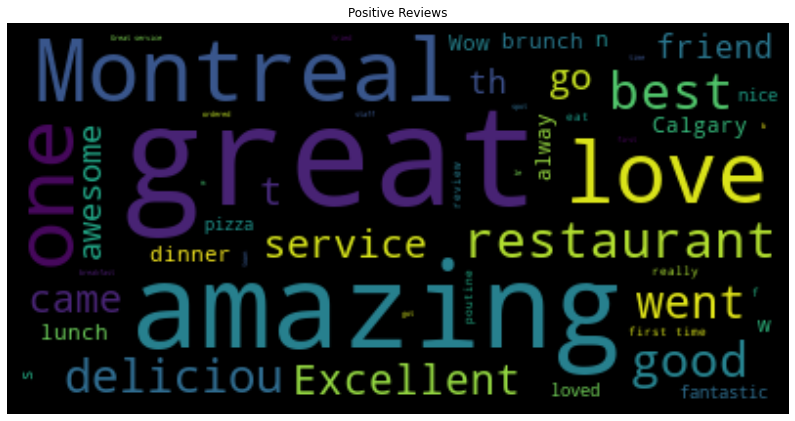

In [23]:
default_colors = wc.to_array()
plt.figure(figsize=(14,12))
plt.title("Positive Reviews")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

### Create n-grams for 5 star reviews

#### Create a counter for 5-star reviews

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/homecomputer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
from collections import Counter
from nltk.corpus import stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/homecomputer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
cachedStopWords = set(stopwords.words("english"))
cachedStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [28]:
tokens_5 = [w for w in nltk.word_tokenize(text_reviews_5.lower())
        if w.isalpha()]

In [29]:
no_stops_5 = [t for t in tokens_5
        if t not in cachedStopWords]

In [30]:
# most common single word count
Counter(no_stops_5).most_common(50)

[('place', 12694),
 ('food', 9544),
 ('great', 9230),
 ('best', 7277),
 ('restaurant', 4872),
 ('amazing', 4632),
 ('service', 4580),
 ('love', 4280),
 ('good', 4117),
 ('montreal', 3992),
 ('one', 3570),
 ('delicious', 2989),
 ('excellent', 2925),
 ('went', 2665),
 ('really', 2248),
 ('time', 2190),
 ('first', 2165),
 ('came', 2058),
 ('de', 1817),
 ('go', 1797),
 ('ever', 1745),
 ('le', 1627),
 ('little', 1577),
 ('pizza', 1537),
 ('nice', 1481),
 ('brunch', 1443),
 ('breakfast', 1408),
 ('awesome', 1406),
 ('experience', 1399),
 ('la', 1385),
 ('favorite', 1371),
 ('spot', 1367),
 ('wow', 1356),
 ('lunch', 1353),
 ('staff', 1352),
 ('friendly', 1309),
 ('favourite', 1293),
 ('fantastic', 1291),
 ('dinner', 1288),
 ('calgary', 1278),
 ('always', 1278),
 ('un', 1241),
 ('loved', 1238),
 ('sushi', 1198),
 ('super', 1198),
 ('th', 1196),
 ('like', 1191),
 ('et', 1127),
 ('atmosphere', 1113),
 ('night', 1103)]

In [31]:
#Add Words to stopwords
cachedStopWords.update(('de', 'th', 'et', 'la', 'le', 'un', 'place'))

In [32]:
# Import Ngrams
from nltk.util import ngrams

bigrams = ngrams(no_stops_5, 2)
Counter(bigrams).most_common(20)

[(('great', 'food'), 1226),
 (('love', 'place'), 1219),
 (('one', 'best'), 1135),
 (('first', 'time'), 895),
 (('great', 'service'), 823),
 (('food', 'great'), 816),
 (('great', 'place'), 789),
 (('amazing', 'food'), 677),
 (('place', 'great'), 532),
 (('place', 'amazing'), 466),
 (('good', 'food'), 454),
 (('excellent', 'food'), 437),
 (('food', 'service'), 431),
 (('really', 'good'), 430),
 (('smoked', 'meat'), 411),
 (('delicious', 'food'), 386),
 (('love', 'love'), 370),
 (('service', 'great'), 360),
 (('one', 'favorite'), 351),
 (('one', 'favourite'), 348)]

#### Create a counter using lemmatizing for 5-star reviews

In [33]:
#Import Wordnetlemmatizer from NLTK in order to create Ngrams
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/homecomputer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/homecomputer/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [34]:
#lemmatize data
lemmatized_5 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops_5]

In [35]:
#Trigram word count
trigrams_lem_5 = ngrams(lemmatized_5, 3)
Counter(trigrams_lem_5).most_common(20)


[(('great', 'food', 'great'), 252),
 (('food', 'great', 'service'), 244),
 (('love', 'love', 'love'), 165),
 (('one', 'best', 'meal'), 141),
 (('smoked', 'meat', 'sandwich'), 139),
 (('great', 'service', 'great'), 106),
 (('one', 'best', 'restaurant'), 103),
 (('service', 'great', 'food'), 102),
 (('best', 'smoked', 'meat'), 93),
 (('one', 'favourite', 'place'), 88),
 (('place', 'great', 'food'), 85),
 (('one', 'favorite', 'place'), 83),
 (('food', 'excellent', 'service'), 83),
 (('food', 'amazing', 'service'), 82),
 (('amazing', 'food', 'great'), 81),
 (('one', 'best', 'place'), 80),
 (('one', 'favorite', 'restaurant'), 77),
 (('best', 'indian', 'food'), 76),
 (('excellent', 'food', 'service'), 75),
 (('best', 'meal', 'ever'), 72)]

In [36]:
df_counts_5 = pd.DataFrame(Counter(trigrams_lem_5).most_common(20))
df_counts_5.head()

Empty DataFrame
Columns: []
Index: []

In [37]:
# Create Trigram DataFrame for 5 star reviews
df_trigram_5 = (pd.Series(nltk.ngrams(lemmatized_5, 3)).value_counts())
df_trigram_5 = pd.DataFrame(df_trigram_5).reset_index()
df_trigram_5.rename(columns={'index': 'word_5', 0:'freq_5'},inplace=True)
df_trigram_5.head(10)

word_5  freq_5
0      (great, food, great)     252
1    (food, great, service)     244
2        (love, love, love)     165
3         (one, best, meal)     141
4  (smoked, meat, sandwich)     139
5   (great, service, great)     106
6   (one, best, restaurant)     103
7    (service, great, food)     102
8      (best, smoked, meat)      93
9   (one, favourite, place)      88

In [38]:
df_trigram_pos10 = df_trigram_5.head(10)
df_trigram_pos10

word_5  freq_5
0      (great, food, great)     252
1    (food, great, service)     244
2        (love, love, love)     165
3         (one, best, meal)     141
4  (smoked, meat, sandwich)     139
5   (great, service, great)     106
6   (one, best, restaurant)     103
7    (service, great, food)     102
8      (best, smoked, meat)      93
9   (one, favourite, place)      88

### Create Bar Plot to visualize 5 star trigrams

Text(0, 0.5, 'Trigram')

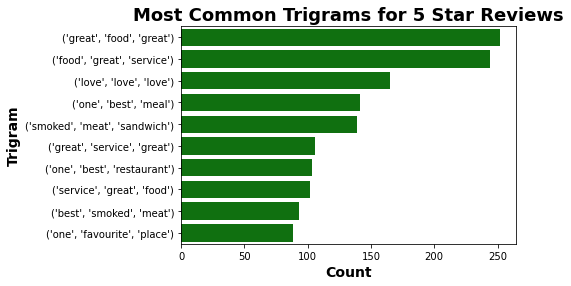

In [39]:
# Create Barplot
sns.barplot(x = 'freq_5' , y = 'word_5', data = df_trigram_pos10, color = 'g')
plt.title('Most Common Trigrams for 5 Star Reviews', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Count', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Trigram', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

In [40]:
# Quadgram word count
quadgrams_lem_5 = ngrams(lemmatized_5, 4)
Counter(quadgrams_lem_5).most_common(20)

[(('great', 'food', 'great', 'service'), 100),
 (('love', 'love', 'love', 'place'), 55),
 (('great', 'service', 'great', 'food'), 50),
 (('one', 'best', 'meal', 'ever'), 39),
 (('au', 'pied', 'de', 'cochon'), 33),
 (('say', 'enough', 'good', 'thing'), 29),
 (('amazing', 'food', 'great', 'service'), 28),
 (('great', 'food', 'great', 'atmosphere'), 27),
 (('best', 'smoked', 'meat', 'sandwich'), 25),
 (('amazing', 'food', 'amazing', 'service'), 24),
 (('great', 'food', 'great', 'price'), 24),
 (('best', 'indian', 'food', 'ever'), 22),
 (('could', 'give', 'place', 'star'), 21),
 (('ca', 'say', 'enough', 'good'), 21),
 (('food', 'great', 'service', 'great'), 20),
 (('love', 'place', 'great', 'food'), 19),
 (('good', 'food', 'good', 'service'), 18),
 (('one', 'best', 'indian', 'restaurant'), 18),
 (('food', 'even', 'better', 'service'), 16),
 (('one', 'favourite', 'place', 'eat'), 15)]

In [41]:
# Create quadgram DataFrame for 5 star reviews
df_quadgram_5 = (pd.Series(nltk.ngrams(lemmatized_5, 4)).value_counts())
df_quadgram_5 = pd.DataFrame(df_quadgram_5).reset_index()
df_quadgram_5.rename(columns={'index': 'word_5', 0:'freq_5'},inplace=True)
df_quadgram_5.head(10)

word_5  freq_5
0     (great, food, great, service)     100
1         (love, love, love, place)      55
2     (great, service, great, food)      50
3           (one, best, meal, ever)      39
4            (au, pied, de, cochon)      33
5        (say, enough, good, thing)      29
6   (amazing, food, great, service)      28
7  (great, food, great, atmosphere)      27
8    (best, smoked, meat, sandwich)      25
9       (great, food, great, price)      24

## Ngrams for 1 Star Restaurants

### Create df_reviews_1

In [42]:
df_reviews_1 = df_reviews_all[df_reviews_all['restaurant_rating']== 1]
df_reviews_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21564 entries, 3 to 233039
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_name        21564 non-null  object 
 1   restaurant_rating      21564 non-null  float64
 2   text                   21564 non-null  object 
 3   date                   21564 non-null  object 
 4   reviewer_name          21563 non-null  object 
 5   review_count_rest      21564 non-null  int64  
 6   yelping_since          21564 non-null  object 
 7   elite                  2524 non-null   object 
 8   average_stars          21564 non-null  float64
 9   city                   21564 non-null  object 
 10  state                  21564 non-null  object 
 11  postal_code            21493 non-null  object 
 12  reviewer_rating        21564 non-null  float64
 13  review_count_reviewer  21564 non-null  int64  
 14  is_open                21564 non-null  int64  
 15  a

In [43]:
df_reviews_1['restaurant_name'].value_counts()


McDonald's               354
Boston Pizza             160
Tim Hortons              135
Ana Meilleure Cuisine    129
Schwartz's               103
                        ... 
Maison Ho (La)             1
Fushi Restaurant           1
Grill Barroso              1
Roch le Coq                1
L'Oeuf Doré                1
Name: restaurant_name, Length: 4688, dtype: int64

In [44]:
df_reviews_all['restaurant_name'].value_counts()["McDonald's"]
Mcdonalds = (df_reviews_1['restaurant_name'].value_counts()["McDonald's"])/(df_reviews_all['restaurant_name'].value_counts()["McDonald's"])
Mcdonalds

0.48760330578512395

### Create text strings for text

In [45]:
text_reviews_1 = df_reviews_1['text']
text_reviews_1 = text_reviews_1.to_string()
display(type(text_reviews_1))
text_reviews_1

str

'3         I only ever eat at three of the millions of Am...\n6         Usually hit up the Amir in NDG, but decided to...\n7         We\'ve ordered delivery from this place several...\n10        Service tres négatif ! Le serveur a un languag...\n11        I recently had the misfortune of ordering lunc...\n12        1h15 d\'attente pour recevoir mon repas. Le tou...\n15        Got a shish taouk sandwich to go... Asked for ...\n20        Do not order online! I ordered via their websi...\n21        Just BAD and Gross food. Should be ashamed to ...\n28        I love piadine... So I was really excited to t...\n42        Terrible value for price. Bland sandwiches.  L...\n53        Pretty basic meals. Do not expect a gourmet ex...\n54        Went in here to grab a late night bite and the...\n57        ABSOLUTELY DO NOT recommend coming to this res...\n64        As an avid foodie, I\'ve been to at least hundr...\n73        We went here on Mother\'s day. We were really d...\n79        Repas plu

### Create a counter for 1-star reviews

In [46]:
tokens_1 = [w for w in nltk.word_tokenize(text_reviews_1.lower())
        if w.isalpha()]

In [47]:
no_stops_1 = [t for t in tokens_1
        if t not in cachedStopWords]

In [48]:
Counter(no_stops_1).most_common(50)

[('food', 2364),
 ('service', 2340),
 ('worst', 1398),
 ('went', 1183),
 ('restaurant', 972),
 ('ordered', 916),
 ('ever', 837),
 ('terrible', 835),
 ('good', 807),
 ('one', 675),
 ('bad', 673),
 ('horrible', 645),
 ('experience', 613),
 ('time', 612),
 ('go', 565),
 ('came', 557),
 ('really', 515),
 ('first', 515),
 ('would', 514),
 ('give', 449),
 ('like', 444),
 ('could', 402),
 ('pizza', 400),
 ('never', 392),
 ('got', 359),
 ('order', 351),
 ('last', 348),
 ('w', 343),
 ('great', 343),
 ('review', 335),
 ('used', 327),
 ('star', 319),
 ('rude', 315),
 ('staff', 314),
 ('night', 313),
 ('eat', 290),
 ('stars', 288),
 ('reviews', 284),
 ('awful', 282),
 ('disappointed', 280),
 ('get', 277),
 ('chicken', 272),
 ('lunch', 260),
 ('waited', 257),
 ('slow', 251),
 ('montreal', 251),
 ('location', 251),
 ('try', 247),
 ('times', 245),
 ('even', 244)]

In [49]:
bigrams = ngrams(no_stops_1, 2)
Counter(bigrams).most_common(20)

[(('terrible', 'service'), 255),
 (('worst', 'service'), 239),
 (('first', 'time'), 187),
 (('service', 'ever'), 185),
 (('could', 'give'), 178),
 (('customer', 'service'), 156),
 (('horrible', 'service'), 156),
 (('one', 'worst'), 137),
 (('food', 'good'), 126),
 (('one', 'star'), 121),
 (('bad', 'service'), 116),
 (('worst', 'experience'), 107),
 (('last', 'night'), 104),
 (('give', 'zero'), 100),
 (('zero', 'stars'), 99),
 (('food', 'ever'), 87),
 (('service', 'food'), 87),
 (('give', 'stars'), 85),
 (('worst', 'restaurant'), 85),
 (('service', 'terrible'), 84)]

### Create a counter using lemmatizing for 1-star reviews

In [50]:
lemmatized_1 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops_1]

In [51]:
trigrams_lem_1 = ngrams(lemmatized_1, 3)
Counter(trigrams_lem_1).most_common(20)

[(('worst', 'service', 'ever'), 136),
 (('give', 'zero', 'star'), 78),
 (('could', 'give', 'star'), 57),
 (('could', 'give', 'zero'), 56),
 (('worst', 'experience', 'ever'), 55),
 (('wish', 'could', 'give'), 43),
 (('give', 'star', 'would'), 38),
 (('zero', 'star', 'would'), 37),
 (('worst', 'customer', 'service'), 36),
 (('worst', 'chinese', 'food'), 29),
 (('food', 'good', 'service'), 28),
 (('worst', 'restaurant', 'ever'), 27),
 (('worst', 'dining', 'experience'), 24),
 (('one', 'worst', 'restaurant'), 24),
 (('customer', 'service', 'ever'), 23),
 (('worst', 'food', 'ever'), 23),
 (('really', 'wanted', 'like'), 22),
 (('food', 'terrible', 'service'), 22),
 (('would', 'give', 'zero'), 21),
 (('chinese', 'food', 'ever'), 21)]

In [52]:
# Create Trigram DataFrame for 1 star reviews
df_trigram_1 = (pd.Series(nltk.ngrams(lemmatized_1, 3)).value_counts())
df_trigram_1 = pd.DataFrame(df_trigram_1).reset_index()
df_trigram_1.rename(columns={'index': 'word_1', 0:'freq_1'},inplace=True)
df_trigram_1.head(10)

word_1  freq_1
0      (worst, service, ever)     136
1          (give, zero, star)      78
2         (could, give, star)      57
3         (could, give, zero)      56
4   (worst, experience, ever)      55
5         (wish, could, give)      43
6         (give, star, would)      38
7         (zero, star, would)      37
8  (worst, customer, service)      36
9      (worst, chinese, food)      29

In [53]:
df_trigram_neg10 = df_trigram_1.head(10)
df_trigram_neg10

word_1  freq_1
0      (worst, service, ever)     136
1          (give, zero, star)      78
2         (could, give, star)      57
3         (could, give, zero)      56
4   (worst, experience, ever)      55
5         (wish, could, give)      43
6         (give, star, would)      38
7         (zero, star, would)      37
8  (worst, customer, service)      36
9      (worst, chinese, food)      29

### Create Bar Plot for visualizations of 1 star reviews

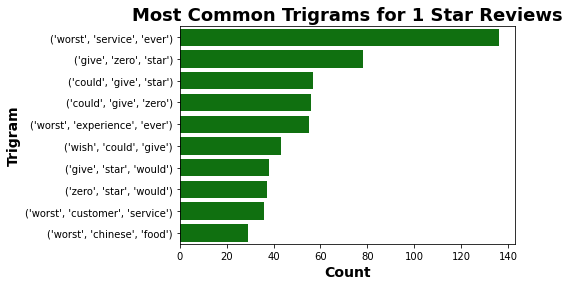

In [54]:
# Create Barplot
sns.barplot(x = 'freq_1' , y = 'word_1', data = df_trigram_neg10, color = 'g')
plt.title('Most Common Trigrams for 1 Star Reviews', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Count', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Trigram', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.savefig("output.jpg")

In [55]:
quadgrams_lem_1 = ngrams(lemmatized_1, 4)
Counter(quadgrams_lem_1).most_common(20)

[(('could', 'give', 'zero', 'star'), 44),
 (('could', 'give', 'star', 'would'), 32),
 (('give', 'zero', 'star', 'would'), 32),
 (('worst', 'customer', 'service', 'ever'), 22),
 (('worst', 'chinese', 'food', 'ever'), 20),
 (('wish', 'could', 'give', 'star'), 17),
 (('would', 'give', 'zero', 'star'), 15),
 (('wish', 'could', 'give', 'zero'), 12),
 (('give', 'zero', 'star', 'could'), 12),
 (('could', 'give', 'negative', 'star'), 10),
 (('give', 'le', 'one', 'star'), 10),
 (('worst', 'indian', 'food', 'ever'), 9),
 (('could', 'give', 'zero', 'would'), 8),
 (('worst', 'service', 'ever', 'experienced'), 7),
 (('worst', 'dining', 'experience', 'ever'), 7),
 (('one', 'worst', 'dining', 'experience'), 7),
 (('would', 'give', 'star', 'could'), 6),
 (('could', 'give', 'le', 'one'), 6),
 (('hand', 'worst', 'service', 'ever'), 5),
 (('food', 'good', 'service', 'terrible'), 5)]

In [56]:
# Create quadgram DataFrame for 1 star reviews
df_quadgram_1 = (pd.Series(nltk.ngrams(lemmatized_1, 4)).value_counts())
df_quadgram_1 = pd.DataFrame(df_quadgram_1).reset_index()
df_quadgram_1.rename(columns={'index': 'word_1', 0:'freq_1'},inplace=True)
df_quadgram_1.head(10)

word_1  freq_1
0         (could, give, zero, star)      44
1        (could, give, star, would)      32
2         (give, zero, star, would)      32
3  (worst, customer, service, ever)      22
4      (worst, chinese, food, ever)      20
5         (wish, could, give, star)      17
6         (would, give, zero, star)      15
7         (give, zero, star, could)      12
8         (wish, could, give, zero)      12
9             (give, le, one, star)      10

### Create a Wordcloud for 1-star reviews

In [57]:
from PIL import Image
from os import path
import random

from wordcloud import WordCloud

In [58]:
from wordcloud import STOPWORDS

In [59]:
stopwords = set(STOPWORDS)

In [60]:
stop_words = STOPWORDS.update(["place", "food"])

In [61]:
wc1 = WordCloud(max_words=50, stopwords=stop_words, margin=10, random_state=1).generate(text_reviews_1)


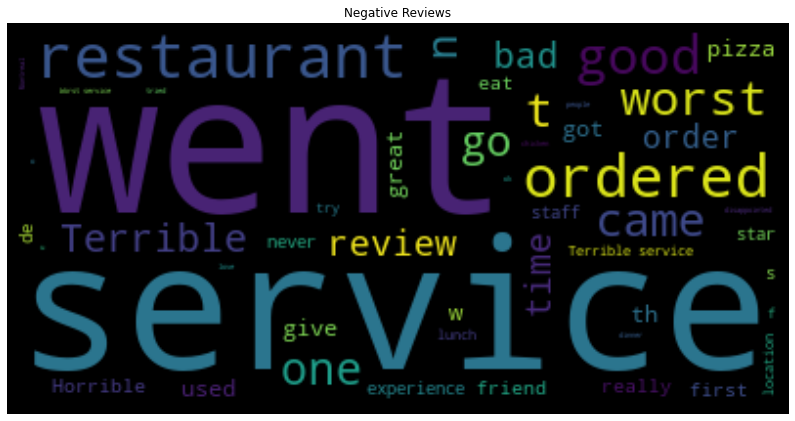

In [62]:
default_colors = wc1.to_array()
plt.figure(figsize=(14,12))
plt.title("Negative Reviews")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

In [63]:
df_trigrams = pd.concat((df_trigram_1, df_trigram_5), axis=1)
df_trigrams.head(10)

word_1  freq_1                    word_5  freq_5
0      (worst, service, ever)   136.0      (great, food, great)     252
1          (give, zero, star)    78.0    (food, great, service)     244
2         (could, give, star)    57.0        (love, love, love)     165
3         (could, give, zero)    56.0         (one, best, meal)     141
4   (worst, experience, ever)    55.0  (smoked, meat, sandwich)     139
5         (wish, could, give)    43.0   (great, service, great)     106
6         (give, star, would)    38.0   (one, best, restaurant)     103
7         (zero, star, would)    37.0    (service, great, food)     102
8  (worst, customer, service)    36.0      (best, smoked, meat)      93
9      (worst, chinese, food)    29.0   (one, favourite, place)      88

In [64]:
df_quadgrams = pd.concat((df_quadgram_1, df_quadgram_5), axis=1)
df_quadgrams.head(10)

word_1  freq_1                            word_5  \
0         (could, give, zero, star)    44.0     (great, food, great, service)   
1        (could, give, star, would)    32.0         (love, love, love, place)   
2         (give, zero, star, would)    32.0     (great, service, great, food)   
3  (worst, customer, service, ever)    22.0           (one, best, meal, ever)   
4      (worst, chinese, food, ever)    20.0            (au, pied, de, cochon)   
5         (wish, could, give, star)    17.0        (say, enough, good, thing)   
6         (would, give, zero, star)    15.0   (amazing, food, great, service)   
7         (give, zero, star, could)    12.0  (great, food, great, atmosphere)   
8         (wish, could, give, zero)    12.0    (best, smoked, meat, sandwich)   
9             (give, le, one, star)    10.0       (great, food, great, price)   

   freq_5  
0     100  
1      55  
2      50  
3      39  
4      33  
5      29  
6      28  
7      27  
8      25  
9      24

### review sample data

In [65]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 100)
df_reviews_text = df_reviews_all[['restaurant_name', 'restaurant_rating', 'city', 'text']]
df_reviews_text.head().style.set_table_styles(
[{'selector': 'th', #text for the header
  'props': [('background', '#ffbf00'),
            ('color', 'blue'),
            ('font-family', 'arial'),
            ('text-align','center')]},
 
{'selector': 'td', #text for the data
 'props': [('font-family', 'avenir'),
            ('text-align','center')]},
 
{'selector': 'tr:nth-of-type(odd)', #odd number rows
 'props': [('background', '#DCDCDC')]},
 
{'selector': 'tr:nth-of-type(even)', #even numbered rows
'props': [('background', 'black'),
          ('color', '#DCDCDC')]},
 
{'selector': 'tr:hover', #hover style
'props': [('background-color', 'yellow'),
          ('color', '#11037d')]}
]
).hide_index()

In [66]:
df_reviews_text[df_reviews_text['text'].str.contains("smoked", case=False, na=False)]

restaurant_name  restaurant_rating  \
35      Torteria Lupita                            5.0                 
179     Restaurant Houston Steaks et Cotes Levees  1.0                 
220     Sushi Club K'z                             3.0                 
494     Mad Hatter Pub                             4.0                 
975     Tutti Frutti Déjeuners                     4.0                 
...                        ...                     ...                 
232722  Famoso Pizzeria                            4.0                 
232889  Brioche à Tête                             4.0                 
232903  Famous Delly Boys                          1.0                 
232906  Avec Bistro                                4.0                 
233036  Resto-Cafe Oxford                          5.0                 

                   city  \
35      Montréal          
179     Dorval            
220     Calgary           
494     Montréal          
975     Greenfield Park   
...                 ...   
232722  Calgary           
232889  Montréal          
232903  Cote-Saint-Luc    
232906  Calgary           
233036  Montréal          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [67]:
df_reviews_all.head()

restaurant_name  restaurant_rating  \
0  Amir            2.0                 
1  Amir            3.0                 
2  Amir            2.0                 
3  Amir            1.0                 
4  Amir            3.0                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        text  \
0  Good food, terrible customer service.  For me customer service plays a huge role in every dining experience.  So the attitude of the employees throws me off.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## Summary

#### After taking a look in the Yelp reviews for restaurants, we found some interesting insights on the type of words used in reviews. There seemed to be a relationship between the style of wording used and the review being either positive or negative. When looking at the reviews, we wanted to give our new business owner an idea on where to focus on their new restaurant. The reviews that received a 5 star rating, typically had words that how great the service was, location, or the quality of the food. While the 1 star ratings demonstrated the opposite where the service was bad, the order was not of good quality, and used negative verbiage to explain their point of view. 

#### We have determined that the owner should put a focus on the following;
    - Ensure your food is of high quality when served
    - Focus on training your employees on what constitute quality customer service.
 

## Create a Recommender System using PCA

### Create a pivot table named df_pizza_pivot

In [68]:
#review dataset
df_reviews_all.head()

restaurant_name  restaurant_rating  \
0  Amir            2.0                 
1  Amir            3.0                 
2  Amir            2.0                 
3  Amir            1.0                 
4  Amir            3.0                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        text  \
0  Good food, terrible customer service.  For me customer service plays a huge role in every dining experience.  So the attitude of the employees throws me off.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [69]:
#Filter to only needed data
df_rest = df_reviews_all.loc[:, ['restaurant_name', 'restaurant_rating', 'categories']]
df_rest.sample(20)

restaurant_name  restaurant_rating  \
193953  Thi Thi Vietnamese Subs          5.0                 
146875  La Chilenita                     5.0                 
112646  Shokunin                         2.0                 
135559  Jimmy's A & A Deli               4.0                 
210496  Asie Moderne                     4.0                 
17924   Postino Cafe & Lounge            4.0                 
176099  Le Roi d'Ontario                 1.0                 
127236  Spinelli Italian Centre Shop     3.0                 
36029   The Bier Markt                   2.0                 
7804    Grumans Catering & Delicatessen  3.0                 
127678  Le Vieux Vélo                    4.0                 
166266  Rufus Rockhead                   4.0                 
112187  Régine Café                      5.0                 
60866   Bota Bota                        4.0                 
123623  Gaga Pizzeria                    4.0                 
88186   Blackfoot Truck Stop Restaurant  5.0                 
51091   Patati Patata                    4.0                 
186777  Yuan                             4.0                 
6653    Chez Cora                        1.0                 
187524  Siam                             4.0                 

                                                                                                                                                                                                                                                       categories  
193953  Vietnamese, Food, Restaurants, Ethnic Food, Sandwiches, Specialty Food                                                                                                                                                                                     
146875  Restaurants, Food, Latin American, Delicatessen                                                                                                                                                                                                            
112646  Restaurants, Japanese, Bars, Cocktail Bars, Nightlife, Tapas/Small Plates                                                                                                                                                                                  
135559  Donairs, Mediterranean, Convenience Stores, Food, Grocery, Restaurants                                                                                                                                                                                     
210496  Cambodian, Asian Fusion, Restaurants                                                                                                                                                                                                                       
17924   Restaurants, Bars, Nightlife, Cafes, Coffee & Tea, Lounges, Food, Beer, Wine & Spirits                                                                                                                                                                     
176099  Fast Food, Restaurants, Food                                                                                                                                                                                                                               
127236  Restaurants, Italian                                                                                                                                                                                                                                       
36029   Food, Beer, Wine & Spirits, Arts & Entertainment, Modern European, Belgian, Music Venues, Canadian (New), Venues & Event Spaces, Restaurants, Bars, Sports Bars, Breakfast & Brunch, Nightlife, American (Traditional), German, Event Planning & Services  
7804    Caterers, Event Planning & Services, Breakfast & Brunch, Delis, Canadian (New), Restaurants                      

In [70]:
#convert data type to a string
df_rest['categories'] = df_rest['categories'].astype('string')
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233040 entries, 0 to 233039
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   restaurant_name    233040 non-null  object 
 1   restaurant_rating  233040 non-null  float64
 2   categories         233040 non-null  string 
dtypes: float64(1), object(1), string(1)
memory usage: 7.1+ MB


In [71]:
#create new dataframe containing only rows that conatin pizza
df_pizza = df_rest[df_rest['categories'].str.contains('Pizza', na=False)]
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16062 entries, 297 to 232761
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_name    16062 non-null  object 
 1   restaurant_rating  16062 non-null  float64
 2   categories         16062 non-null  string 
dtypes: float64(1), object(1), string(1)
memory usage: 501.9+ KB


In [72]:
#Create a new DataFrame by using a pivot table with df_pizza
df_pizza_pivot = pd.pivot_table(df_pizza, index=['restaurant_name'], columns=['categories'], values='restaurant_rating')
df_pizza_pivot.head()


categories           American (New), Restaurants, Canadian (New), Sandwiches, Burgers, Pizza  \
restaurant_name                                                                                
2M Pizza            NaN                                                                        
3 Coeurs            NaN                                                                        
4th Street Pizza    NaN                                                                        
722 World Bier Haus NaN                                                                        
900 Degree Pizza    NaN                                                                        

categories           American (Traditional), Breakfast & Brunch, Seafood, Burgers, Restaurants, Pizza  \
restaurant_name                                                                                         
2M Pizza            NaN                                                                                 
3 Coeurs            NaN                                                                                 
4th Street Pizza    NaN                                                                                 
722 World Bier Haus NaN                                                                                 
900 Degree Pizza    NaN                                                                                 

categories           American (Traditional), Pizza, Canadian (New), Bars, Restaurants, Nightlife, Burgers, Sports Bars  \
restaurant_name                                                                                                          
2M Pizza            NaN                                                                                                  
3 Coeurs            NaN                                                                                                  
4th Street Pizza    NaN                                                                                                  
722 World Bier Haus NaN                                                                                                  
900 Degree Pizza    NaN                                                                                                  

categories           American (Traditional), Restaurants, Pizza, Italian  \
restaurant_name                                                            
2M Pizza            NaN                                                    
3 Coeurs            NaN                                                    
4th Street Pizza    NaN                                                    
722 World Bier Haus NaN                                                    
900 Degree Pizza    NaN                                                    

categories           American (Traditional), Restaurants, Poutineries, Diners, Pizza  \
restaurant_name                                                                        
2M Pizza            NaN                                                                
3 Coeurs            NaN                                                                
4th Street Pizza    NaN                                                                
722 World Bier Haus NaN                                                                
900 Degree Pizza    NaN                                                                

categories           Bakeries, Coffee & Tea, Pizza, Food, Restaurants  \
restaurant_name                                                         
2M Pizza            NaN                                                 
3 Coeurs            NaN                                                 
4th Street Pizza    NaN                                                 
722 World Bier Haus NaN                                                 
900 Degree Pizza    NaN                                                 

categories           Bakeries, Food, Pizza, Middle Eastern, Restaurants  \

In [73]:
# Fill Null Values
df_pizza_pivot = df_pizza_pivot.fillna(0)
df_pizza_pivot.head()

categories           American (New), Restaurants, Canadian (New), Sandwiches, Burgers, Pizza  \
restaurant_name                                                                                
2M Pizza             0.0                                                                       
3 Coeurs             0.0                                                                       
4th Street Pizza     0.0                                                                       
722 World Bier Haus  0.0                                                                       
900 Degree Pizza     0.0                                                                       

categories           American (Traditional), Breakfast & Brunch, Seafood, Burgers, Restaurants, Pizza  \
restaurant_name                                                                                         
2M Pizza             0.0                                                                                
3 Coeurs             0.0                                                                                
4th Street Pizza     0.0                                                                                
722 World Bier Haus  0.0                                                                                
900 Degree Pizza     0.0                                                                                

categories           American (Traditional), Pizza, Canadian (New), Bars, Restaurants, Nightlife, Burgers, Sports Bars  \
restaurant_name                                                                                                          
2M Pizza             0.0                                                                                                 
3 Coeurs             0.0                                                                                                 
4th Street Pizza     0.0                                                                                                 
722 World Bier Haus  0.0                                                                                                 
900 Degree Pizza     0.0                                                                                                 

categories           American (Traditional), Restaurants, Pizza, Italian  \
restaurant_name                                                            
2M Pizza             0.0                                                   
3 Coeurs             0.0                                                   
4th Street Pizza     0.0                                                   
722 World Bier Haus  0.0                                                   
900 Degree Pizza     0.0                                                   

categories           American (Traditional), Restaurants, Poutineries, Diners, Pizza  \
restaurant_name                                                                        
2M Pizza             0.0                                                               
3 Coeurs             0.0                                                               
4th Street Pizza     0.0                                                               
722 World Bier Haus  0.0                                                               
900 Degree Pizza     0.0                                                               

categories           Bakeries, Coffee & Tea, Pizza, Food, Restaurants  \
restaurant_name                                                         
2M Pizza             0.0                                                
3 Coeurs             0.0                                                
4th Street Pizza     0.0                                                
722 World Bier Haus  0.0                                                
900 Degree Pizza     0.0                                                

categories           Bakeries, Food, Pizza, Middle Eastern, Restaurants  \

In [74]:
restaurant_names = df_pizza_pivot.index
restaurant_names

Index(['2M Pizza', '3 Coeurs', '4th Street Pizza', '722 World Bier Haus',
       '900 Degree Pizza', 'A Perfect Pizza', 'A Pizza 555', 'A Pizza Plus',
       'A&P Chinese Food Express', 'ADONIS',
       ...
       'YUL Pizza', 'Yellow Box', 'Z Biztro', 'ZIBO!', 'Zappy Pizza',
       'Zesto Resto Bar & Grill', 'Zestos Pizza', 'Zibo!', 'la boîte a pizza',
       'theLOCAL390'],
      dtype='object', name='restaurant_name', length=748)

### Create a PCA for df_pizza_pivot

In [75]:
#Import PCA
from sklearn.decomposition import PCA

# Create number of components
n_pcs = 150
model = PCA(n_components=n_pcs)

# Fit the model - return projected data
df_pca_150 = model.fit_transform(df_pizza_pivot)

#Create a DataFrame of the projected data
df_pizza_pca = pd.DataFrame(df_pca_150)
df_pizza_pca.head()

0         1         2         3         4         5         6    \
0  3.271011  0.648487 -0.016531 -0.004926 -0.026012 -0.013100 -0.036997   
1 -0.468149 -0.752143 -0.208266 -0.094320 -0.135859 -0.131521  0.064419   
2  3.929371  0.891706  0.014281  0.009599 -0.009754  0.005357 -0.058539   
3 -0.465144 -0.745338 -0.200625 -0.090608 -0.129918 -0.124655  0.059821   
4  3.865161  0.869695  0.012178  0.008425 -0.009927  0.004139 -0.052072   

        7         8         9         10        11        12        13   \
0 -0.006846  0.000359 -0.046993 -0.027890  0.000270  0.001392 -0.008962   
1 -0.044909 -0.026103  0.005196 -0.002174 -0.024941 -0.030054 -0.022499   
2 -0.001433  0.004844 -0.067337 -0.038989  0.004898 -0.000131 -0.006786   
3 -0.041302 -0.023291  0.004667 -0.001954 -0.021719 -0.018648 -0.018473   
4 -0.001626  0.003922 -0.055166 -0.032037  0.003408  0.004210 -0.007784   

        14        15        16        17        18        19        20   \
0 -0.000436 -0.000184 -0.000188 -0.000206 -0.000408 -0.000521 -0.000800   
1 -0.013838 -0.015095 -0.006205 -0.015876 -0.019654 -0.006054  0.004649   
2 -0.001891  0.003708  0.010413  0.001005 -0.009389 -0.000090 -0.009968   
3 -0.011891 -0.010087 -0.008639 -0.010545 -0.016891 -0.009769 -0.007537   
4  0.001159  0.001177  0.000969  0.001204  0.001832  0.000735  0.000078   

        21        22        23        24        25        26        27   \
0  0.005225 -0.002033 -0.021741 -0.012028 -0.006051 -0.001794 -0.001474   
1  0.013140 -0.028373  0.008545 -0.014980  0.010225 -0.048393 -0.004993   
2  0.013824  0.025252 -0.011937 -0.042739 -0.021846 -0.035105  0.005233   
3 -0.001105 -0.015375  0.005011 -0.007910 -0.004238 -0.005997 -0.009863   
4  0.006170 -0.000301 -0.025919 -0.012915 -0.006484 -0.001288 -0.000467   

        28        29        30        31        32        33        34   \
0 -0.022427 -0.002879 -0.001013 -0.001157 -0.019437 -0.015511 -0.000229   
1  0.017019 -0.027248 -0.035176 -0.059325  0.074519  0.042420 -0.008123   
2 -0.060340  0.035608 -0.015121 -0.038013 -0.065505  0.001823 -0.072814   
3 -0.000450 -0.018393 -0.011393 -0.019439  0.010361 -0.001975 -0.001721   
4 -0.025949 -0.000930  0.000413  0.001194 -0.023916 -0.017869 -0.000158   

        35        36        37        38        39        40        41   \
0  0.000832 -0.000487  0.000529 -0.000644 -0.000228  0.000876  0.003311   
1 -0.000323  0.100867  0.036261  0.100471  0.060435 -0.064310  0.012891   
2 -0.036366 -0.048080  0.023486  0.058689 -0.108905 -0.019093 -0.042693   
3  0.000750 -0.002191  0.000989 -0.002353  0.003616 -0.002638 -0.001435   
4  0.000941 -0.000297  0.000519 -0.000607 -0.000749  0.001442  0.003983   

        42        43        44        45        46        47        48   \
0  0.001729 -0.000593  0.000524  0.000823 -0.000007  0.001830 -0.002437   
1 -0.081092 -0.067520  0.052914  0.009506  0.020722 -0.054104 -0.057288   
2 -0.055082  0.106883  0.028615 -0.129773  0.061581  0.019893  0.024961   
3 -0.018027 -0.008909 -0.005482  0.001323 -0.002897 -0.002775 -0.007199   
4  0.004342  0.000469  0.001361  0.001043  0.000289  0.002466 -0.001906   

        49        50        51        52        53        54        55   \
0 -0.000198  0.000533  0.000928  0.001639  0.000646  0.000811  0.000842   
1  0.052773 -0.028353 -0.086599 -0.048640  0.006871  0.014638  0.049137   
2  0.080751 -0.027634 -0.050978 -0.042572  0.040967  0.082673  0.039549   
3  0.002388 -0.006166 -0.006377  0.003397 -0.004515  0.004021 -0.000594   
4 -0.000390  0.001315  0.001725  0.001510  0.001163  0.000491  0.000980   

        56        57        58        59        60        61        62   \
0  0.002225 -0.000206 -0.000574  0.003837  0.000294  0.000971  0.001734   
1 -0.025361  0.021906 -0.013551 -0.037403  0.032930  0.018930  0.007546   
2 -0.078849  0.042011 -0.089579 -0.159151  0.094355 -0.036244 -0.181106   
3 -0.006190 -0.004731 -0.007962 -0.005329 -0.009609 -0.000285 -0.004972   
4  0.003343  0.000278  0.

In [76]:
# at PC as headings
names = []
for x in range(n_pcs):
    names.append('PC%d'%(x+1))

df_pizza_pca.columns = names
df_pizza_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.271011  0.648487 -0.016531 -0.004926 -0.026012 -0.013100 -0.036997   
1 -0.468149 -0.752143 -0.208266 -0.094320 -0.135859 -0.131521  0.064419   
2  3.929371  0.891706  0.014281  0.009599 -0.009754  0.005357 -0.058539   
3 -0.465144 -0.745338 -0.200625 -0.090608 -0.129918 -0.124655  0.059821   
4  3.865161  0.869695  0.012178  0.008425 -0.009927  0.004139 -0.052072   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.006846  0.000359 -0.046993 -0.027890  0.000270  0.001392 -0.008962   
1 -0.044909 -0.026103  0.005196 -0.002174 -0.024941 -0.030054 -0.022499   
2 -0.001433  0.004844 -0.067337 -0.038989  0.004898 -0.000131 -0.006786   
3 -0.041302 -0.023291  0.004667 -0.001954 -0.021719 -0.018648 -0.018473   
4 -0.001626  0.003922 -0.055166 -0.032037  0.003408  0.004210 -0.007784   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.000436 -0.000184 -0.000188 -0.000206 -0.000408 -0.000521 -0.000800   
1 -0.013838 -0.015095 -0.006205 -0.015876 -0.019654 -0.006054  0.004649   
2 -0.001891  0.003708  0.010413  0.001005 -0.009389 -0.000090 -0.009968   
3 -0.011891 -0.010087 -0.008639 -0.010545 -0.016891 -0.009769 -0.007537   
4  0.001159  0.001177  0.000969  0.001204  0.001832  0.000735  0.000078   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  0.005225 -0.002033 -0.021741 -0.012028 -0.006051 -0.001794 -0.001474   
1  0.013140 -0.028373  0.008545 -0.014980  0.010225 -0.048393 -0.004993   
2  0.013824  0.025252 -0.011937 -0.042739 -0.021846 -0.035105  0.005233   
3 -0.001105 -0.015375  0.005011 -0.007910 -0.004238 -0.005997 -0.009863   
4  0.006170 -0.000301 -0.025919 -0.012915 -0.006484 -0.001288 -0.000467   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0 -0.022427 -0.002879 -0.001013 -0.001157 -0.019437 -0.015511 -0.000229   
1  0.017019 -0.027248 -0.035176 -0.059325  0.074519  0.042420 -0.008123   
2 -0.060340  0.035608 -0.015121 -0.038013 -0.065505  0.001823 -0.072814   
3 -0.000450 -0.018393 -0.011393 -0.019439  0.010361 -0.001975 -0.001721   
4 -0.025949 -0.000930  0.000413  0.001194 -0.023916 -0.017869 -0.000158   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0  0.000832 -0.000487  0.000529 -0.000644 -0.000228  0.000876  0.003311   
1 -0.000323  0.100867  0.036261  0.100471  0.060435 -0.064310  0.012891   
2 -0.036366 -0.048080  0.023486  0.058689 -0.108905 -0.019093 -0.042693   
3  0.000750 -0.002191  0.000989 -0.002353  0.003616 -0.002638 -0.001435   
4  0.000941 -0.000297  0.000519 -0.000607 -0.000749  0.001442  0.003983   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0  0.001729 -0.000593  0.000524  0.000823 -0.000007  0.001830 -0.002437   
1 -0.081092 -0.067520  0.052914  0.009506  0.020722 -0.054104 -0.057288   
2 -0.055082  0.106883  0.028615 -0.129773  0.061581  0.019893  0.024961   
3 -0.018027 -0.008909 -0.005482  0.001323 -0.002897 -0.002775 -0.007199   
4  0.004342  0.000469  0.001361  0.001043  0.000289  0.002466 -0.001906   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0 -0.000198  0.000533  0.000928  0.001639  0.000646  0.000811  0.000842   
1  0.052773 -0.028353 -0.086599 -0.048640  0.006871  0.014638  0.049137   
2  0.080751 -0.027634 -0.050978 -0.042572  0.040967  0.082673  0.039549   
3  0.002388 -0.006166 -0.006377  0.003397 -0.004515  0.004021 -0.000594   
4 -0.000390  0.001315  0.001725  0.001510  0.001163  0.000491  0.000980   

       PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
0  0.002225 -0.000206 -0.000574  0.003837  0.000294  0.000971  0.001734   
1 -0.025361  0.021906 -0.013551 -0.037403  0.032930  0.018930  0.007546   
2 -0.078849  0.042011 -0.089579 -0.159151  0.094355 -0.036244 -0.181106   
3 -0.006190 -0.004731 -0.007962 -0.005329 -0.009609 -0.000285 -0.004972   
4  0.003343  0.000278  0.

In [77]:
#Create a DataFrame that shows the explained_ratio and explained_ratio_sum
pd.set_option('display.max_rows',200)
explained_ratio = model.explained_variance_ratio_
explained_ratio = pd.DataFrame(explained_ratio)
explained_ratio = explained_ratio.rename(columns = {0: 'explained_ratio'})
explained_ratio['explained_ratio_sum']= np.cumsum(explained_ratio.explained_ratio)
explained_ratio

explained_ratio  explained_ratio_sum
0    0.159011         0.159011           
1    0.112920         0.271931           
2    0.028237         0.300168           
3    0.026295         0.326463           
4    0.023760         0.350223           
5    0.019987         0.370210           
6    0.014841         0.385051           
7    0.012863         0.397915           
8    0.009493         0.407408           
9    0.008256         0.415663           
10   0.008058         0.423722           
11   0.004927         0.428649           
12   0.004432         0.433081           
13   0.004333         0.437414           
14   0.004085         0.441499           
15   0.003832         0.445331           
16   0.003703         0.449034           
17   0.003663         0.452696           
18   0.003540         0.456236           
19   0.003315         0.459551           
20   0.003282         0.462833           
21   0.003278         0.466112           
22   0.003251         0.469363           
23   0.003224         0.472587           
24   0.003128         0.475716           
25   0.003088         0.478803           
26   0.003076         0.481879           
27   0.003062         0.484941           
28   0.003034         0.487974           
29   0.003019         0.490993           
30   0.002939         0.493932           
31   0.002897         0.496829           
32   0.002508         0.499337           
33   0.002416         0.501753           
34   0.002381         0.504134           
35   0.002380         0.506515           
36   0.002379         0.508894           
37   0.002377         0.511271           
38   0.002376         0.513648           
39   0.002372         0.516020           
40   0.002369         0.518389           
41   0.002360         0.520748           
42   0.002350         0.523099           
43   0.002288         0.525387           
44   0.002265         0.527652           
45   0.002226         0.529878           
46   0.002205         0.532083           
47   0.002183         0.534266           
48   0.002181         0.536447           
49   0.002176         0.538623           
50   0.002172         0.540795           
51   0.002166         0.542961           
52   0.002154         0.545115           
53   0.002143         0.547258           
54   0.002133         0.549391           
55   0.002123         0.551514           
56   0.002111         0.553625           
57   0.002095         0.555719           
58   0.002083         0.557803           
59   0.002076         0.559879           
60   0.002071         0.561950           
61   0.002060         0.564010           
62   0.002056         0.566065           
63   0.002049         0.568115           
64   0.002044         0.570158           
65   0.002024         0.572183           
66   0.001995         0.574178           
67   0.001989         0.576167           
68   0.001984         0.578150           
69   0.001972         0.580123           
70   0.001963         0.582085           
71   0.001955         0.584040           
72   0.001937         0.585977           
73   0.001930         0.587908           
74   0.001929         0.589836           
75   0.001920         0.591757           
76   0.001910         0.593667           
77   0.001904         0.595571           
78   0.001902         0.597472           
79   0.001888         0.599361           
80   0.001885         0.601246           
81   0.001877         0.603123           
82   0.001870         0.604993           
83   0.001863         0.606856           
84   0.001855         0.608711           
85   0.001849         0.610560           
86   0.001839         0.612400           
87   0.001830         0.614230           
88   0.001827         0.616057           
89   0.001794         0.617851           
90   0.001789         0.619641           
91   0.001781         0.621421           
92   0.001777         0.623199           
93   0.001761         0.624959           
94   0.001755  

### Create a Correlation Matrix for a Recommender System

In [78]:
#View Info about data
df_pizza_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Columns: 150 entries, PC1 to PC150
dtypes: float64(150)
memory usage: 876.7 KB


In [79]:
#Create a correlation matrix
corr_mat_pizza = np.corrcoef(df_pizza_pca)

In [80]:
#Change corr_mat_pizza into a DataFrame
corr_mat_pizza = pd.DataFrame(corr_mat_pizza, columns=(restaurant_names))
corr_mat_pizza.index = restaurant_names
corr_mat_pizza

restaurant_name          2M Pizza  3 Coeurs  4th Street Pizza  \
restaurant_name                                                 
2M Pizza                 1.000000 -0.210877  0.886384           
3 Coeurs                -0.210877  1.000000 -0.301922           
4th Street Pizza         0.886384 -0.301922  1.000000           
722 World Bier Haus     -0.641188  0.338240 -0.591917           
900 Degree Pizza         0.999608 -0.218258  0.886867           
...                           ...       ...       ...           
Zesto Resto Bar & Grill -0.623256  0.351032 -0.589193           
Zestos Pizza            -0.429277  0.268869 -0.384742           
Zibo!                   -0.145998  0.057984 -0.137373           
la boîte a pizza        -0.186761  0.032980 -0.165436           
theLOCAL390             -0.145810  0.097548 -0.088015           

restaurant_name          722 World Bier Haus  900 Degree Pizza  \
restaurant_name                                                  
2M Pizza                -0.641188             0.999608           
3 Coeurs                 0.338240            -0.218258           
4th Street Pizza        -0.591917             0.886867           
722 World Bier Haus      1.000000            -0.662396           
900 Degree Pizza        -0.662396             1.000000           
...                           ...                  ...           
Zesto Resto Bar & Grill  0.973721            -0.643951           
Zestos Pizza             0.682496            -0.443871           
Zibo!                    0.229217            -0.150859           
la boîte a pizza         0.115683            -0.186593           
theLOCAL390              0.219115            -0.150464           

restaurant_name          A Perfect Pizza  A Pizza 555  A Pizza Plus  \
restaurant_name                                                       
2M Pizza                -0.359627         0.997275    -0.357627       
3 Coeurs                -0.000485        -0.190630    -0.137416       
4th Street Pizza        -0.277021         0.881781    -0.293842       
722 World Bier Haus     -0.180759        -0.582880    -0.421372       
900 Degree Pizza        -0.344342         0.994820    -0.333642       
...                           ...              ...          ...       
Zesto Resto Bar & Grill -0.194041        -0.566366    -0.410488       
Zestos Pizza            -0.058912        -0.389196    -0.279532       
Zibo!                   -0.098987        -0.132636    -0.094655       
la boîte a pizza        -0.086881        -0.186501    -0.129454       
theLOCAL390             -0.004681        -0.132996    -0.094124       

restaurant_name          A&P Chinese Food Express    ADONIS  Ab King Pizza  \
restaurant_name                                                              
2M Pizza                -0.118345                 -0.536830  0.999941        
3 Coeurs                 0.062274                  0.253873 -0.213769        
4th Street Pizza        -0.144660                 -0.508476  0.886655        
722 World Bier Haus      0.175789                  0.839849 -0.649502        
900 Degree Pizza        -0.122003                 -0.554754  0.999854        
...                           ...                       ...       ...        
Zesto Resto Bar & Grill  0.184014                  0.822883 -0.631369        
Zestos Pizza             0.134736                  0.564097 -0.434998        
Zibo!                    0.059564                  0.109684 -0.147904        
la boîte a pizza         0.023411                  0.097399 -0.186713        
theLOCAL390              0.060949                  0.184113 -0.147635        

restaurant_name          Ad's Buffalo Wings & Pizza     Adamo  \
restaurant_name                                                 
2M Pizza                -0.576340                   -0.361275   
3 Coeurs                 0.329152                   -0.136120   
4th Street Pizza        -0.563681                   -0.297135   
722 World Bier Haus      0.9002

In [81]:
#Create Domino's DataFrame
corr_domino = pd.DataFrame(corr_mat_pizza["Domino's"])
corr_domino.sort_values(ascending=False, by="Domino's").head()

Domino's
restaurant_name                
Restaurant Tre Colori  1.000000
Domino's               1.000000
Chicago Pizza          0.999988
Mio Pizza              0.999978
Tomato                 0.999966

In [82]:
#View top 10 Correlation Matrix for Domino's
corr_domino = corr_domino.sort_values(ascending=False, by="Domino's").head(11)
corr_domino

Domino's
restaurant_name                
Restaurant Tre Colori  1.000000
Domino's               1.000000
Chicago Pizza          0.999988
Mio Pizza              0.999978
Tomato                 0.999966
St Bruno Pizza         0.999932
Pizza Expresso         0.999842
Metro Pizza            0.999796
Pizza Dorval Express   0.999662
Pizza City             0.999531
Panini Pizza & Pasta   0.999531